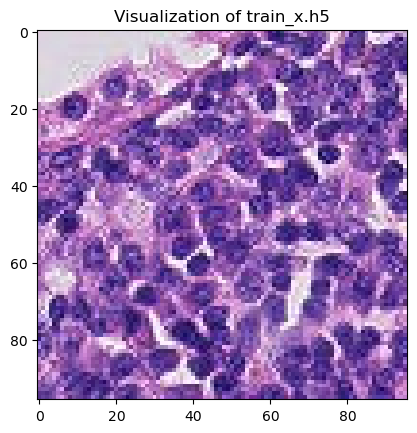

In [1]:
import os
import h5py
import matplotlib.pyplot as plt


folder_path = '/Users/ramsesnestor/Desktop/data'


file_to_dataset = {
    'train_x.h5': 'x',
    'train_y.h5': 'y',
    'valid_x.h5': 'x',
    'valid_y.h5': 'y',
    'test_x.h5': 'x',
    'test_y.h5': 'y'
}


for filename, dataset_name in file_to_dataset.items():
    file_path = os.path.join(folder_path, filename)
    
    with h5py.File(file_path, 'r') as file:
       
        dataset = file[dataset_name]
        
        
        data = dataset[:]
        
 
        
      
        if 'train_x.h5' in filename:
            plt.imshow(data[0], cmap='gray')  
            plt.title(f'Visualization of {filename}')
            plt.show()


In [2]:
x_train, y_train, x_valid, y_valid, x_test, y_test = None, None, None, None, None, None


for filename, dataset_name in file_to_dataset.items():
    file_path = os.path.join(folder_path, filename)
    
    with h5py.File(file_path, 'r') as file:
        
        dataset = file[dataset_name]
        
        
        if 'train_x.h5' in filename:
            x_train = dataset[:]
        elif 'train_y.h5' in filename:
            y_train = dataset[:]
        elif 'valid_x.h5' in filename:
            x_valid = dataset[:]
        elif 'valid_y.h5' in filename:
            y_valid = dataset[:]
        elif 'test_x.h5' in filename:
            x_test = dataset[:]
        elif 'test_y.h5' in filename:
            y_test = dataset[:]

In [3]:
len(x_train), len(y_train), len(x_valid), len(y_valid), len(x_test), len(y_test)

(262144, 262144, 32768, 32768, 32768, 32768)

In [4]:
#checking for class imbalance

import numpy as np

unique_classes, class_counts = np.unique(y_train, return_counts=True)

for i, class_count in enumerate(class_counts):
    class_name = unique_classes[i]
    print(f"Class {class_name}: {class_count} samples")


Class 0: 131072 samples
Class 1: 131072 samples


In [5]:
x_train = x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
#y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
#y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
#y_valid = np.asarray(y_valid).astype('float32').reshape((-1,1))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#datagen = ImageDataGenerator(
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest')


#datagen.fit(x_train)


In [8]:
x_train = x_train.reshape(x_train.shape[0], 96, 96, 3)
x_valid = x_valid.reshape(x_valid.shape[0], 96, 96, 3)
x_test = x_test.reshape(x_test.shape[0], 96, 96, 3)


In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import Recall


model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully Connected Layers
model.add(layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification, so use 'sigmoid' activation

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy for binary classification
              metrics=['accuracy', Recall()])


In [35]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=16), validation_data=(x_valid, y_valid),
                    
                     steps_per_epoch=len(x_train)/16, epochs=10)


#test_loss, test_accuracy = model.evaluate(x_test, y_test)

#print(f"test loss: {test_loss}, test acc: {test_accuracy}")


Epoch 1/10


2023-09-18 17:01:34.412515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16384/16384 [==============================] - ETA: 0s - loss: 0.5115 - accuracy: 0.7687 - recall: 0.7607

2023-09-18 17:07:14.717553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16384/16384 [==============================] - 350s 21ms/step - loss: 0.5115 - accuracy: 0.7687 - recall: 0.7607 - val_loss: 0.6733 - val_accuracy: 0.6473 - val_recall: 0.3366
Epoch 2/10
16384/16384 [==============================] - 405s 25ms/step - loss: 0.4553 - accuracy: 0.8043 - recall: 0.7822 - val_loss: 0.7773 - val_accuracy: 0.6244 - val_recall: 0.2767
Epoch 3/10
16384/16384 [==============================] - 353s 22ms/step - loss: 0.4401 - accuracy: 0.8108 - recall: 0.8042 - val_loss: 0.8893 - val_accuracy: 0.6163 - val_recall: 0.2538
Epoch 4/10
16384/16384 [==============================] - 350s 21ms/step - loss: 0.4324 - accuracy: 0.8149 - recall: 0.8155 - val_loss: 0.8939 - val_accuracy: 0.6225 - val_recall: 0.2724
Epoch 5/10
16384/16384 [==============================] - 412s 25ms/step - loss: 0.4301 - accuracy: 0.8174 - recall: 0.8227 - val_loss: 0.6259 - val_accuracy: 0.7210 - val_recall: 0.5046
Epoch 6/10
16384/16384 [==============================] - 349s 21ms/step - l

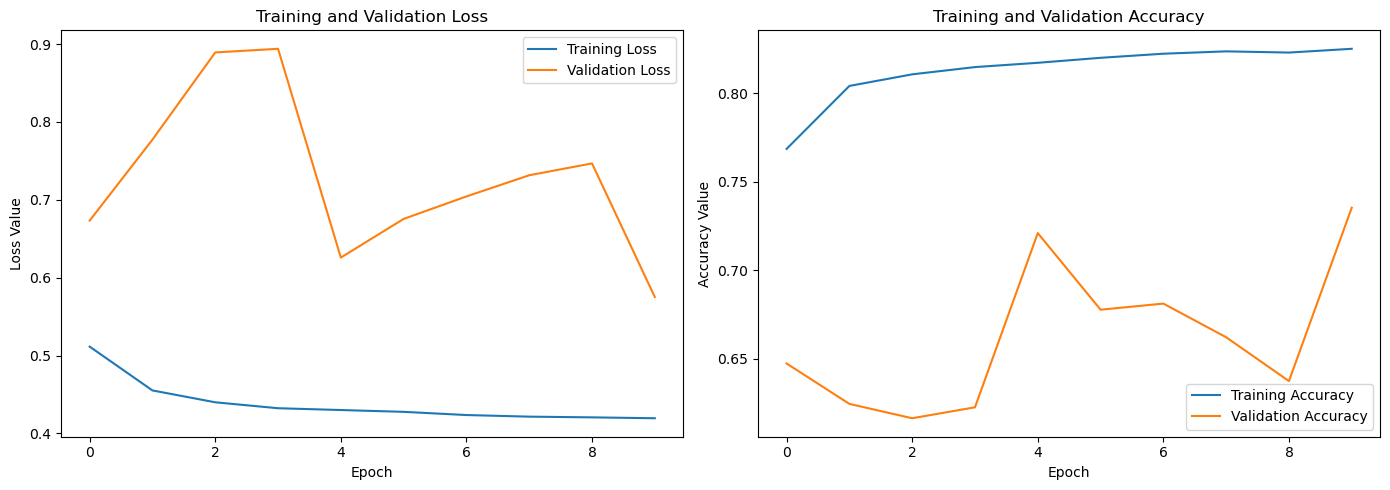

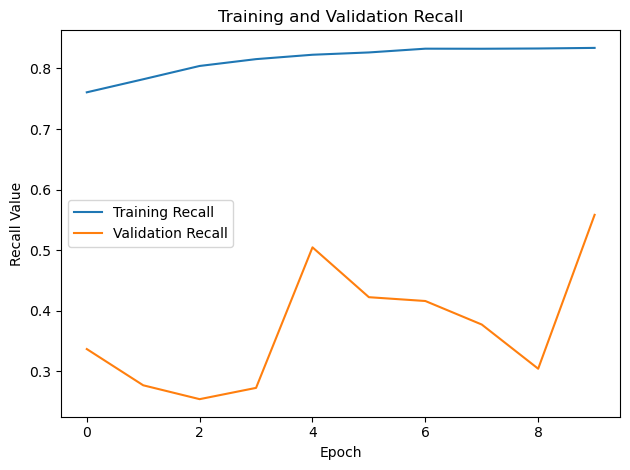

In [48]:
# Plot Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()

plt.tight_layout()
plt.show()


# Plot Recall
plt.subplot(1, 1, 1)
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall Value')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model2 = models.Sequential([
    layers.Flatten(input_shape=(96, 96, 3)),  
    layers.Dense(128, activation='relu'), 
    layers.Dense(1, activation='sigmoid')  
])

# Compile the model
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', Recall()]
)

In [ ]:
history2 = model2.fit(datagen.flow(x_train, y_train, batch_size=16), validation_data=(x_valid, y_valid),
                    
                     steps_per_epoch=len(x_train)/16, epochs=10)